In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv("...//train.csv")
Y=df.label
X=df.drop(columns='label')
#reshaping image into (height,width,channels)
X=X.values.reshape(-1,28,28,1)

(28, 28, 1)

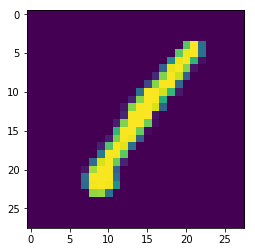

In [71]:
from keras.utils.np_utils import to_categorical
#converting labels into a one-hot encoded vector
Y = to_categorical(Y, num_classes = 10)
#visualizing images
%matplotlib inline
plt.imshow(X[0][:,:,0])

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Using TensorFlow backend.


In [27]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [30]:
epochs = 40 
batchs = 80

In [34]:
model.fit(x=X,y=Y,batch_size=batchs,epochs=epochs)

Epoch 1/40
42000/42000 [==============================] - 134s 3ms/step - loss: 0.7938 - acc: 0.8385
Epoch 2/40
42000/42000 [==============================] - 140s 3ms/step - loss: 0.1290 - acc: 0.9611
Epoch 3/40
42000/42000 [==============================] - 135s 3ms/step - loss: 0.0941 - acc: 0.9714
Epoch 4/40
42000/42000 [==============================] - 121s 3ms/step - loss: 0.0804 - acc: 0.9758
Epoch 5/40
42000/42000 [==============================] - 124s 3ms/step - loss: 0.0713 - acc: 0.9790
Epoch 6/40
42000/42000 [==============================] - 135s 3ms/step - loss: 0.0647 - acc: 0.9807
Epoch 7/40
42000/42000 [==============================] - 137s 3ms/step - loss: 0.0618 - acc: 0.9814
Epoch 8/40
42000/42000 [==============================] - 135s 3ms/step - loss: 0.0607 - acc: 0.9820
Epoch 9/40
42000/42000 [==============================] - 136s 3ms/step - loss: 0.0579 - acc: 0.9834
Epoch 10/40
42000/42000 [==============================] - 135s 3ms/step - loss: 0.0573 - a

In [36]:
test=pd.read_csv("...//test.csv")
test=test.values.reshape(-1,28,28,1)
results=model.predict(test)

In [39]:
results=np.argmax(results,axis=1)

In [51]:
imageid=[i for i in range(1,28001)]
print(results.shape)
len(imageid)

(28000,)


28000

In [53]:
final=pd.DataFrame({'ImageId':imageid,'label':results})
final.to_csv('mydigitsol.csv',encoding='utf-8',index=False)